<a href="https://colab.research.google.com/github/piyushchouhan/Data-Science/blob/main/Economic_Data_Analysis_with_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Economic Data Analysis with Fred & Pandas
Pull The data, Visualize, discover insights... All with python/pandas!

In [1]:
!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'put_your_key_here'



# 1.Create the Fred object

In [3]:
fred= Fred(api_key="3ba49dbd9fbac9a5e288c501b7f81353")

In [4]:
fred

# 2. Search 

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-05-04,2022-05-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-05-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-04 09:07:01-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-05-04,2022-05-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-04-26 08:04:02-05:00,89,"For more information regarding the index, plea..."
SP500,SP500,2022-05-04,2022-05-04,S&P 500,2012-05-07,2022-05-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-05-04 19:10:56-05:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-05-04,2022-05-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-05-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-04 09:07:06-05:00,82,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2022-05-04,2022-05-04,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,82,Household data are collected as of March. As ...


# 3. Pulling some data

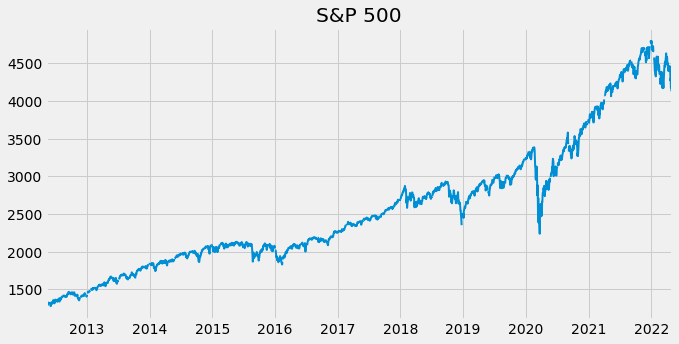

In [7]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and join multiple data series

In [30]:
uemp_results = fred.search('unemployment')
uemp_results 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-04,2022-05-04,Unemployment Rate,1948-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-01 07:44:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-05-04,2022-05-04,Unemployment Rate,1948-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-01 07:44:20-05:00,56,The unemployment rate represents the number of...
NROU,NROU,2022-05-04,2022-05-04,Noncyclical Rate of Unemployment,1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:05-06:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-05-04,2022-05-04,Unemployment Level,1948-01-01,2022-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-04-01 07:44:10-05:00,66,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-05-04,2022-05-04,Unemployment Rate - Black or African American,1972-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-01 07:44:05-05:00,68,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCSPAR0URN,SCSPAR0URN,2022-05-04,2022-05-04,"Unemployment Rate in Spartanburg County, SC",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:09:04-05:00,12,These data come from the Current Population Su...
NYSUFF0URN,NYSUFF0URN,2022-05-04,2022-05-04,"Unemployment Rate in Suffolk County, NY",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:22:04-05:00,12,These data come from the Current Population Su...
TXTARR9URN,TXTARR9URN,2022-05-04,2022-05-04,"Unemployment Rate in Tarrant County, TX",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:26:06-05:00,12,These data come from the Current Population Su...


In [31]:
unrate = fred.get_series('UNRATE')
unrate 

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2021-11-01    4.2
2021-12-01    3.9
2022-01-01    4.0
2022-02-01    3.8
2022-03-01    3.6
Length: 891, dtype: float64

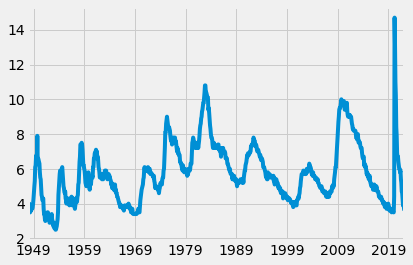

In [32]:
unrate.plot()

In [14]:
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-04,2022-05-04,Unemployment Rate,1948-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-01 07:44:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-05-04,2022-05-04,Unemployment Rate,1948-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-01 07:44:20-05:00,56,The unemployment rate represents the number of...
NROU,NROU,2022-05-04,2022-05-04,Noncyclical Rate of Unemployment,1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:05-06:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-05-04,2022-05-04,Unemployment Level,1948-01-01,2022-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-04-01 07:44:10-05:00,66,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-05-04,2022-05-04,Unemployment Rate - Black or African American,1972-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-01 07:44:05-05:00,68,The series comes from the 'Current Population ...


In [24]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [40]:
unemp_df.index

Index(['UNRATE', 'CAUR', 'NYUR', 'TXUR', 'FLUR', 'OHUR', 'PAUR', 'ALUR',
       'MIUR', 'WIUR', 'GAUR', 'NCUR', 'COUR', 'ILUR', 'NJUR', 'MAUR', 'TNUR',
       'KYUR', 'MNUR', 'AZUR', 'ARUR', 'VAUR', 'WAUR', 'MOUR', 'SCUR', 'IAUR',
       'ORUR', 'INUR', 'WVUR', 'AKUR', 'UTUR', 'OKUR', 'LAUR', 'NVUR', 'NMUR',
       'MDUR', 'KSUR', 'NDUR', 'HIUR', 'CTUR', 'NEUR', 'MSUR', 'MEUR', 'MTUR',
       'SDUR', 'RIUR', 'IDUR', 'WYUR', 'DCUR', 'NHUR', 'VTUR', 'DEUR',
       'M08310USM156SNBR', 'DSUR'],
      dtype='object', name='series id')

In [44]:
unemp_df.shape

(54, 15)

In [59]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1).drop(['M08310USM156SNBR','DSUR'], axis=1)

In [60]:
uemp_results

,UNRATE,CAUR,NYUR,TXUR,FLUR,OHUR,PAUR,ALUR,MIUR,WIUR,GAUR,NCUR,COUR,ILUR,NJUR,MAUR,TNUR,KYUR,MNUR,AZUR,ARUR,VAUR,WAUR,MOUR,SCUR,IAUR,ORUR,INUR,WVUR,AKUR,UTUR,OKUR,LAUR,NVUR,NMUR,MDUR,KSUR,NDUR,HIUR,CTUR,NEUR,MSUR,MEUR,MTUR,SDUR,RIUR,IDUR,WYUR,DCUR,NHUR,VTUR,DEUR
1948-01-01,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,4.2,5.8,5.4,4.9,3.5,4.5,5.5,3.1,5.2,3.1,3.3,4.2,4.3,5.1,5.1,4.8,3.6,4.6,3.1,3.9,3.3,3.3,4.5,3.9,3.6,3.9,4.2,2.7,4.3,5.5,2.3,2.8,4.5,5.3,6.0,5.4,2.8,3.1,4.4,5.2,2.4,4.7,4.2,2.9,2.9,4.7,3.2,4.0,6.1,3.0,3.1,4.8
2021-12-01,3.9,5.8,5.4,4.8,3.5,4.5,5.5,3.1,5.1,3.1,3.3,4.1,4.2,5.1,5.1,4.6,3.6,4.6,3.0,3.9,3.3,3.3,4.5,3.9,3.6,3.9,4.2,2.7,4.3,5.5,2.3,2.8,4.4,5.3,5.9,5.4,2.8,3.1,4.3,5.1,2.3,4.7,4.1,2.9,2.9,4.5,3.1,4.0,6.1,3.0,3.1,4.8
2022-01-01,4.0,5.7,5.3,4.8,3.5,4.3,5.4,3.1,4.9,3.0,3.2,3.9,4.2,5.0,5.1,4.8,3.5,4.4,2.9,3.7,3.2,3.3,4.4,3.8,3.5,3.7,4.2,2.4,4.1,5.6,2.2,2.7,4.3,5.2,5.9,5.4,2.6,3.1,4.3,5.3,2.2,4.6,4.1,2.7,2.8,4.2,3.0,3.8,6.3,2.9,3.0,4.8
2022-02-01,3.8,5.3,4.9,4.7,3.3,4.2,5.1,3.0,4.7,2.9,3.2,3.7,4.0,4.8,4.6,4.7,3.4,4.2,2.7,3.6,3.1,3.2,4.3,3.7,3.5,3.5,4.0,2.3,3.9,5.3,2.1,2.6,4.3,5.1,5.6,5.0,2.5,2.9,4.2,4.9,2.1,4.5,4.0,2.6,2.6,3.9,2.8,3.6,6.1,2.7,2.9,4.6


In [63]:
uemp_states = uemp_results.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [64]:
# Plot States Unemployment Rate
px.line(uemp_states)

## Pull April 2020 Unemployment Rate Per State

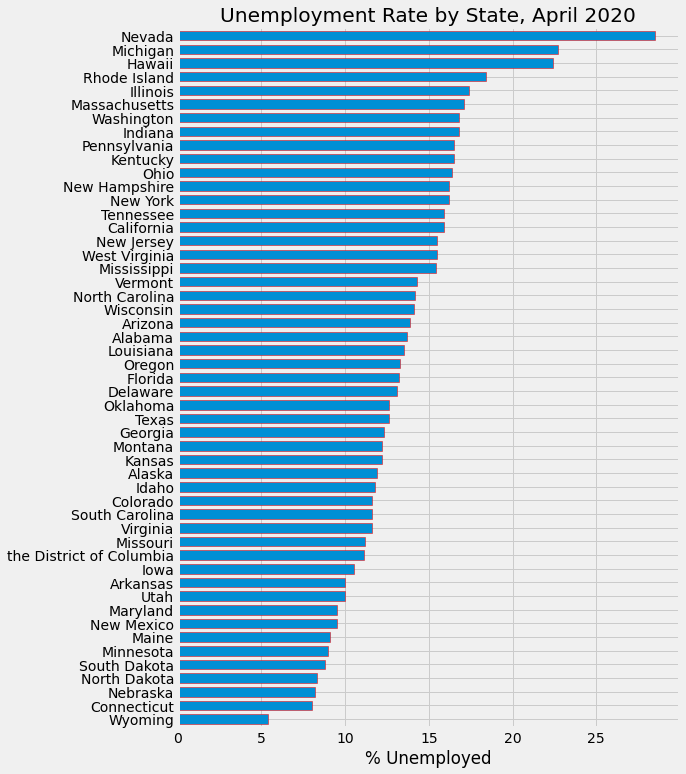

In [73]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='red',
          title='Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [70]:
uemp_states

,California,New York,Texas,Florida,Ohio,Pennsylvania,Alabama,Michigan,Wisconsin,Georgia,North Carolina,Colorado,Illinois,New Jersey,Massachusetts,Tennessee,Kentucky,Minnesota,Arizona,Arkansas,Virginia,Washington,Missouri,South Carolina,Iowa,Oregon,Indiana,West Virginia,Alaska,Utah,Oklahoma,Louisiana,Nevada,New Mexico,Maryland,Kansas,North Dakota,Hawaii,Connecticut,Nebraska,Mississippi,Maine,Montana,South Dakota,Rhode Island,Idaho,Wyoming,the District of Columbia,New Hampshire,Vermont,Delaware
1976-01-01,9.2,10.3,5.8,9.7,8.1,8.0,6.6,9.9,5.8,8.4,6.4,5.8,6.6,10.3,10.5,6.0,5.6,6.0,10.2,7.3,6.1,8.5,5.9,7.4,4.3,9.5,6.6,7.5,7.1,5.8,5.8,6.3,9.2,8.6,6.4,4.2,3.4,9.8,9.8,3.3,6.7,8.7,5.8,3.3,7.8,5.6,4.1,8.7,6.5,8.6,8.0
1976-02-01,9.2,10.3,5.8,9.7,8.1,8.1,6.6,9.9,5.8,8.4,6.4,5.7,6.6,10.3,10.5,6.0,5.6,6.0,10.2,7.3,6.1,8.5,5.9,7.4,4.3,9.5,6.6,7.5,7.1,5.9,5.8,6.3,9.2,8.7,6.4,4.2,3.4,9.8,9.8,3.3,6.7,8.7,5.8,3.3,7.8,5.6,4.1,8.7,6.5,8.6,8.0
1976-03-01,9.1,10.2,5.9,9.6,8.1,8.1,6.6,9.9,5.7,8.4,6.4,5.7,6.6,10.3,10.5,6.0,5.6,5.9,10.1,7.3,6.1,8.4,5.9,7.3,4.3,9.4,6.5,7.5,7.0,5.8,5.8,6.3,9.2,8.7,6.4,4.2,3.4,9.8,9.8,3.3,6.6,8.6,5.8,3.2,7.7,5.6,4.1,8.6,6.5,8.6,8.0
1976-04-01,9.1,10.2,5.9,9.5,8.0,8.1,6.5,9.8,5.6,8.3,6.3,5.6,6.6,10.3,10.3,6.0,5.6,5.8,10.0,7.2,6.0,8.5,6.0,7.2,4.2,9.2,6.3,7.5,6.9,5.8,5.8,6.4,9.0,8.6,6.4,4.2,3.5,9.7,9.6,3.2,6.4,8.6,5.8,3.1,7.7,5.6,4.0,8.5,6.5,8.6,8.1
1976-05-01,9.0,10.1,5.9,9.3,7.8,8.1,6.4,9.6,5.5,8.1,6.1,5.6,6.6,10.3,10.1,5.9,5.5,5.7,9.8,7.1,5.9,8.5,6.0,7.0,4.1,9.1,6.0,7.4,6.9,5.7,5.7,6.5,8.9,8.6,6.5,4.2,3.6,9.4,9.4,3.1,6.3,8.5,5.8,3.1,7.7,5.6,3.9,8.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,5.8,5.4,4.9,3.5,4.5,5.5,3.1,5.2,3.1,3.3,4.2,4.3,5.1,5.1,4.8,3.6,4.6,3.1,3.9,3.3,3.3,4.5,3.9,3.6,3.9,4.2,2.7,4.3,5.5,2.3,2.8,4.5,5.3,6.0,5.4,2.8,3.1,4.4,5.2,2.4,4.7,4.2,2.9,2.9,4.7,3.2,4.0,6.1,3.0,3.1,4.8
2021-12-01,5.8,5.4,4.8,3.5,4.5,5.5,3.1,5.1,3.1,3.3,4.1,4.2,5.1,5.1,4.6,3.6,4.6,3.0,3.9,3.3,3.3,4.5,3.9,3.6,3.9,4.2,2.7,4.3,5.5,2.3,2.8,4.4,5.3,5.9,5.4,2.8,3.1,4.3,5.1,2.3,4.7,4.1,2.9,2.9,4.5,3.1,4.0,6.1,3.0,3.1,4.8
2022-01-01,5.7,5.3,4.8,3.5,4.3,5.4,3.1,4.9,3.0,3.2,3.9,4.2,5.0,5.1,4.8,3.5,4.4,2.9,3.7,3.2,3.3,4.4,3.8,3.5,3.7,4.2,2.4,4.1,5.6,2.2,2.7,4.3,5.2,5.9,5.4,2.6,3.1,4.3,5.3,2.2,4.6,4.1,2.7,2.8,4.2,3.0,3.8,6.3,2.9,3.0,4.8
2022-02-01,5.3,4.9,4.7,3.3,4.2,5.1,3.0,4.7,2.9,3.2,3.7,4.0,4.8,4.6,4.7,3.4,4.2,2.7,3.6,3.1,3.2,4.3,3.7,3.5,3.5,4.0,2.3,3.9,5.3,2.1,2.6,4.3,5.1,5.6,5.0,2.5,2.9,4.2,4.9,2.1,4.5,4.0,2.6,2.6,3.9,2.8,3.6,6.1,2.7,2.9,4.6


## Pull Participation Rate

In [74]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [75]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

## Plot Unemployment vs Participation for each state

In [77]:
# fix name of DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

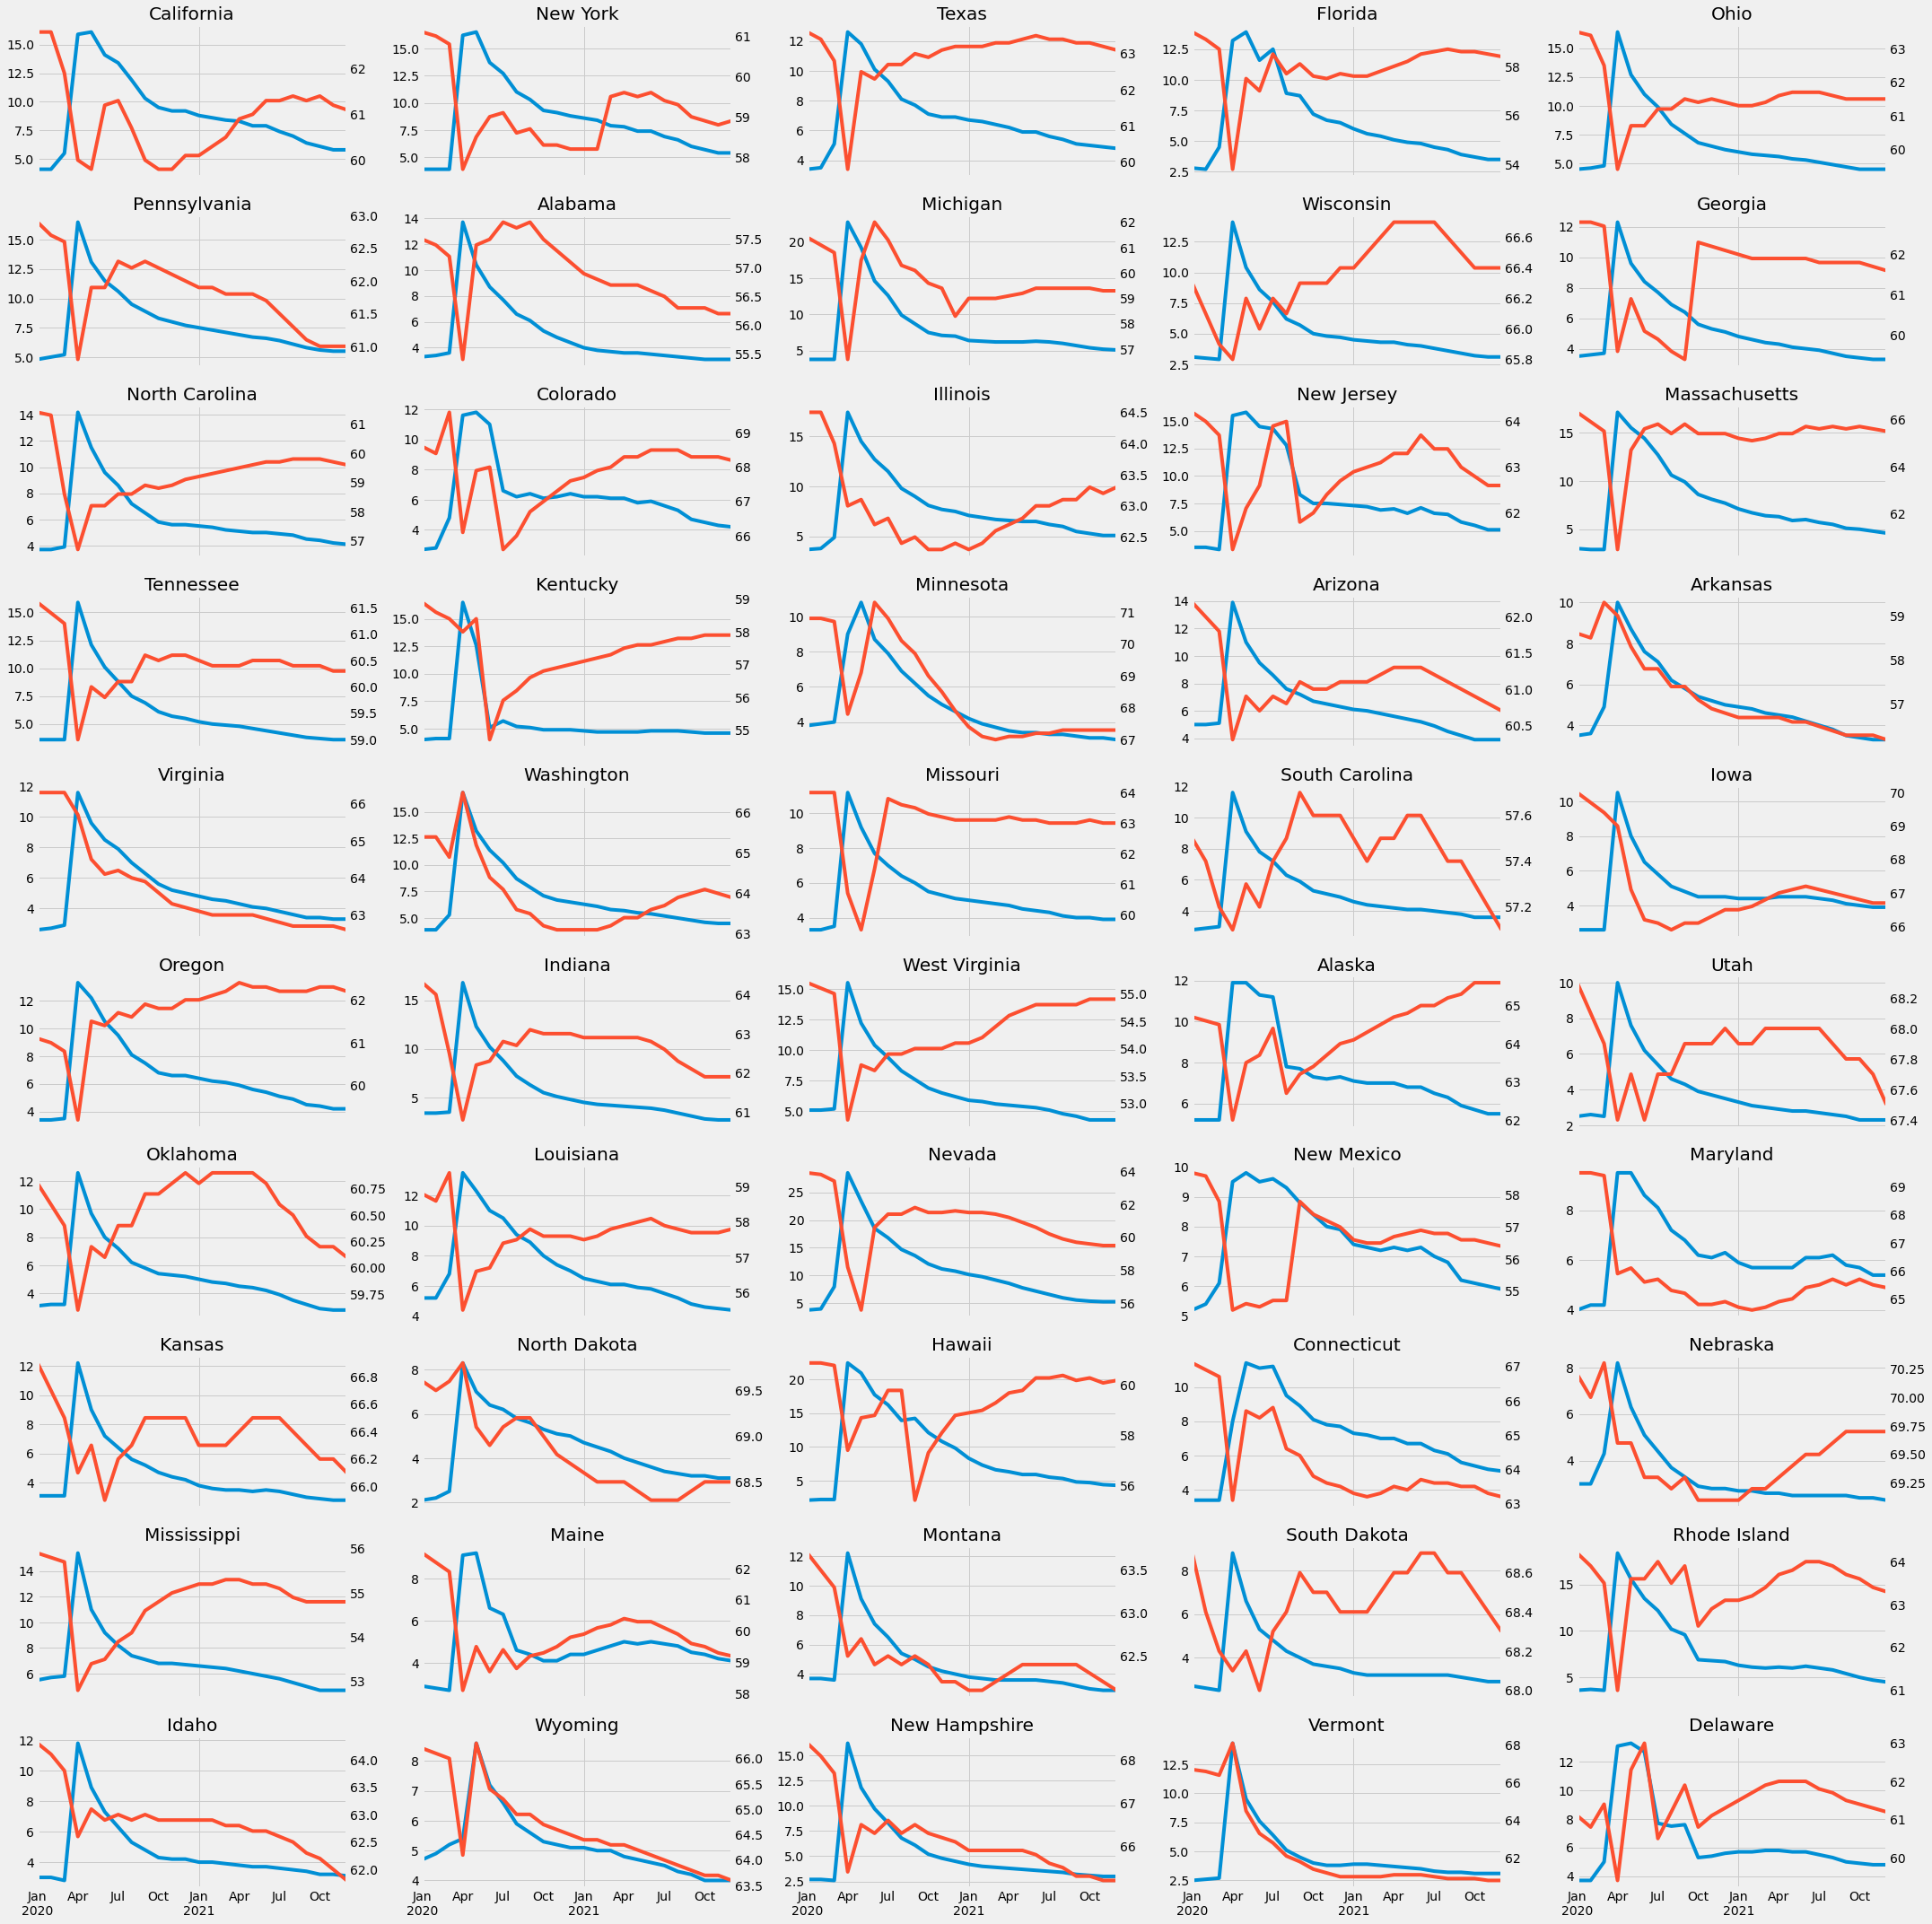

In [78]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state == "District Of Columbia":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()
